In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
from glob import glob
import cv2

from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.layers.normalization import BatchNormalization

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk(r'D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\chest_xray\.DS_Store
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\chest_xray\test\.DS_Store
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\chest_xray\test\NORMAL\IM-0001-0001.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\chest_xray\test\NORMAL\IM-0003-0001.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\chest_xray\test\NORMAL\IM-0005-0001.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\chest_xray\test\NORMAL\IM-0006-0001.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\chest_xray\test\NORMAL\IM-0007-0001.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification

D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\chest_xray\train\NORMAL\NORMAL2-IM-1326-0001.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\chest_xray\train\NORMAL\NORMAL2-IM-1327-0001.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\chest_xray\train\NORMAL\NORMAL2-IM-1328-0001.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\chest_xray\train\NORMAL\NORMAL2-IM-1329-0001.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\chest_xray\train\NORMAL\NORMAL2-IM-1330-0001.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\chest_xray\train\NORMAL\NORMAL2-IM-1332-0001.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\chest_xray\tra

D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\chest_xray\train\PNEUMONIA\person1814_bacteria_4669.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\chest_xray\train\PNEUMONIA\person1816_bacteria_4673.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\chest_xray\train\PNEUMONIA\person1816_bacteria_4674.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\chest_xray\train\PNEUMONIA\person1817_bacteria_4675.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\chest_xray\train\PNEUMONIA\person1818_bacteria_4676.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\chest_xray\train\PNEUMONIA\person1819_bacteria_4677.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final p

D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\chest_xray\train\PNEUMONIA\person688_virus_1282.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\chest_xray\train\PNEUMONIA\person689_bacteria_2585.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\chest_xray\train\PNEUMONIA\person689_bacteria_2586.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\chest_xray\train\PNEUMONIA\person68_bacteria_335.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\chest_xray\train\PNEUMONIA\person68_bacteria_336.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\chest_xray\train\PNEUMONIA\person68_bacteria_337.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumoni

D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\test\PNEUMONIA\person53_virus_107.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\test\PNEUMONIA\person53_virus_108.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\test\PNEUMONIA\person54_virus_109.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\test\PNEUMONIA\person55_virus_110.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\test\PNEUMONIA\person56_virus_112.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\test\PNEUMONIA\person57_virus_113.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\test\PNEUMONIA\person59_virus_116.jpeg
D:\SIT courses 0928 new\Pattern Recogniti

D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\train\PNEUMONIA\person1000_bacteria_2931.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\train\PNEUMONIA\person1000_virus_1681.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\train\PNEUMONIA\person1001_bacteria_2932.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\train\PNEUMONIA\person1002_bacteria_2933.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\train\PNEUMONIA\person1003_bacteria_2934.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\train\PNEUMONIA\person1003_virus_1685.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\train\PNEUMONIA\person1004_bacteria_2935.jpe

D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\train\PNEUMONIA\person332_virus_685.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\train\PNEUMONIA\person333_bacteria_1539.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\train\PNEUMONIA\person333_bacteria_1540.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\train\PNEUMONIA\person333_virus_688.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\train\PNEUMONIA\person334_bacteria_1541.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\train\PNEUMONIA\person334_bacteria_1542.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\train\PNEUMONIA\person334_bacteria_1544.jpeg
D:\SIT 

D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\__MACOSX\chest_xray\test\NORMAL\._NORMAL2-IM-0280-0001.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\__MACOSX\chest_xray\test\NORMAL\._NORMAL2-IM-0281-0001.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\__MACOSX\chest_xray\test\NORMAL\._NORMAL2-IM-0282-0001.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\__MACOSX\chest_xray\test\NORMAL\._NORMAL2-IM-0283-0001.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\__MACOSX\chest_xray\test\NORMAL\._NORMAL2-IM-0285-0001.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\__MACOSX\chest_xray\test\NORMAL\._NORMAL2-IM-0286-0001.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Clas

D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\__MACOSX\chest_xray\train\NORMAL\._NORMAL2-IM-1154-0001-0001.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\__MACOSX\chest_xray\train\NORMAL\._NORMAL2-IM-1154-0001-0002.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\__MACOSX\chest_xray\train\NORMAL\._NORMAL2-IM-1154-0001.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\__MACOSX\chest_xray\train\NORMAL\._NORMAL2-IM-1155-0001.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\__MACOSX\chest_xray\train\NORMAL\._NORMAL2-IM-1156-0001.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\__MACOSX\chest_xray\train\NORMAL\._NORMAL2-IM-1157-0001.jpeg
D:\SIT courses 0928 new\Pattern Reco

D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1600_virus_2777.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1601_bacteria_4209.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1601_bacteria_4212.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1602_bacteria_4218.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1602_virus_2780.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1603_virus_2781.jpeg
D:\SIT course

D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person517_virus_1034.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person517_virus_1035.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person518_bacteria_2197.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person518_bacteria_2198.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person518_bacteria_2199.jpeg
D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person518_bacteria_2200.jpeg
D:\SIT courses 0

<h3>Data Loading<h3>

In [57]:
train_dir = r'D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\train'
test_dir =  r'D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\test'
val_dir = r'D:\SIT courses 0928 new\Pattern Recognition and Classification\final project\pneumonia\chest_xray\val'

In [58]:
def picture_separation(folder):
    y = []
    x = []
    image_list = []

    for foldername in os.listdir(folder):
        if not foldername.startswith('.'):
            if foldername == "NORMAL":
                label = 0
            elif foldername == "PNEUMONIA":
                label = 1
            else:
                label = 2
                
            for image_filename in os.listdir(folder + "/"+ foldername):
                img_file = cv2.imread(folder + "/" + foldername + '/' + image_filename,0)               
                

                if img_file is not None:
                    img = cv2.resize(img_file,(64,64))
                    img_arr = img_to_array(img) / 255
                    x.append(img_arr)
                    y.append(label)
                    image_list.append(foldername + '/' + image_filename)
                                        
    X = np.asarray(x)
    y = np.asarray(y)
    
    

    return X,y,image_list

In [59]:
X_train, y_train, img_train = picture_separation(train_dir)

train_df = pd.DataFrame(img_train, columns=["images"])
train_df["target"] = y_train

In [60]:
train_df.head()

,images,target
0,NORMAL/IM-0115-0001.jpeg,0
1,NORMAL/IM-0117-0001.jpeg,0
2,NORMAL/IM-0119-0001.jpeg,0
3,NORMAL/IM-0122-0001.jpeg,0
4,NORMAL/IM-0125-0001.jpeg,0


In [61]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5216 entries, 0 to 5215
Data columns (total 2 columns):
images    5216 non-null object
target    5216 non-null int32
dtypes: int32(1), object(1)
memory usage: 61.2+ KB


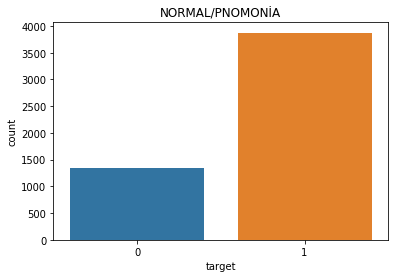

1    3875
0    1341
Name: target, dtype: int64


In [62]:
sns.countplot(train_df["target"])
plt.title("NORMAL/PNOMONİA")
plt.show()
print(train_df["target"].value_counts())

In [63]:
X_val, y_val, img_val = picture_separation(val_dir)

val_df = pd.DataFrame(img_val, columns=["images"])
val_df["target"] = y_val

In [64]:
val_df.head()

,images,target
0,NORMAL/NORMAL2-IM-1427-0001.jpeg,0
1,NORMAL/NORMAL2-IM-1430-0001.jpeg,0
2,NORMAL/NORMAL2-IM-1431-0001.jpeg,0
3,NORMAL/NORMAL2-IM-1436-0001.jpeg,0
4,NORMAL/NORMAL2-IM-1437-0001.jpeg,0


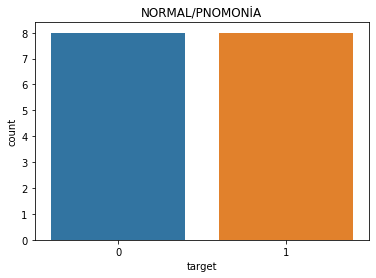

1    8
0    8
Name: target, dtype: int64


In [65]:
sns.countplot(val_df["target"])
plt.title("NORMAL/PNOMONİA")
plt.show()
print(val_df["target"].value_counts())

In [66]:
X_test, y_test, img_test = picture_separation(test_dir)

test_df = pd.DataFrame(img_test, columns=["images"])
test_df["target"] = y_test

In [67]:
test_df.tail()

,images,target
619,PNEUMONIA/person96_bacteria_465.jpeg,1
620,PNEUMONIA/person96_bacteria_466.jpeg,1
621,PNEUMONIA/person97_bacteria_468.jpeg,1
622,PNEUMONIA/person99_bacteria_473.jpeg,1
623,PNEUMONIA/person99_bacteria_474.jpeg,1


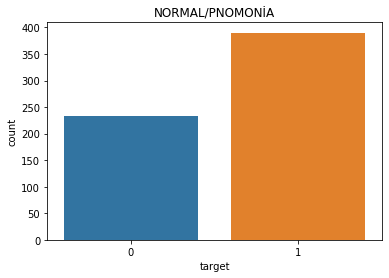

1    390
0    234
Name: target, dtype: int64


In [68]:
sns.countplot(test_df["target"])
plt.title("NORMAL/PNOMONİA")
plt.show()
print(test_df["target"].value_counts())

In [69]:
full_data = pd.concat([train_df, test_df, val_df], axis=0, ignore_index=True)

In [70]:
print(full_data.head())
print(full_data.tail())

                     images  target
0  NORMAL/IM-0115-0001.jpeg       0
1  NORMAL/IM-0117-0001.jpeg       0
2  NORMAL/IM-0119-0001.jpeg       0
3  NORMAL/IM-0122-0001.jpeg       0
4  NORMAL/IM-0125-0001.jpeg       0
                                       images  target
5851  PNEUMONIA/person1949_bacteria_4880.jpeg       1
5852  PNEUMONIA/person1950_bacteria_4881.jpeg       1
5853  PNEUMONIA/person1951_bacteria_4882.jpeg       1
5854  PNEUMONIA/person1952_bacteria_4883.jpeg       1
5855  PNEUMONIA/person1954_bacteria_4886.jpeg       1


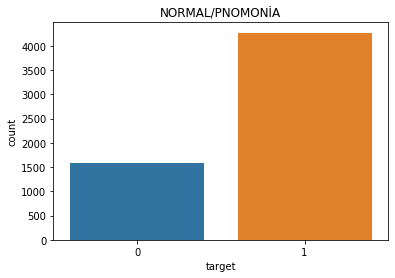

1    4273
0    1583
Name: target, dtype: int64


In [71]:
sns.countplot(full_data["target"])
plt.title("NORMAL/PNOMONİA")
plt.show()
print(full_data["target"].value_counts())

In [72]:
# the shape
X_train.shape

(5216, 64, 64, 1)

In [73]:
className = glob(train_dir + '/*' )
numberOfClass = len(className)
print("NumberOfClass: ",numberOfClass)

NumberOfClass:  2


<h3>Data Augmentation<h3>

In [74]:
batch_size = 32

In [75]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                   shear_range = 0.3,
                   horizontal_flip=True,
                   zoom_range = 0.3)

In [76]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [77]:
val_datagen = ImageDataGenerator(rescale= 1./255)

In [78]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(64, 64),
        batch_size = batch_size,
        color_mode = "grayscale",
        class_mode= "binary")

Found 5216 images belonging to 2 classes.


In [79]:
test_generator = test_datagen.flow_from_directory(
        test_dir, 
        target_size=(64, 64),
        batch_size = batch_size,
        color_mode = "grayscale",
        class_mode= "binary")

Found 624 images belonging to 2 classes.


In [80]:
val_generator = test_datagen.flow_from_directory(
        val_dir, 
        target_size=(64, 64),
        batch_size = batch_size,
        color_mode = "grayscale",
        class_mode= "binary")

Found 16 images belonging to 2 classes.


<h3>Model Building<h3>

In [81]:
X_train.shape[1:]

(64, 64, 1)

In [82]:
np.random.seed(1000)

#Instantiation
model = Sequential()
#1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=X_train.shape[1:], kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
#2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
#3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
#4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
#5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(32,32,3,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
#2nd Fully Connected Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Add Dropout
model.add(Dropout(0.4))
#3rd Fully Connected Layer
model.add(Dense(1000))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Add Dropout
model.add(Dropout(0.4))
#Output Layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

#Model Summary
model.summary()

model.compile(loss = "binary_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 16, 16, 96)        11712     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 96)        384       
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 96)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         614656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 256)         1024      
___________________________

In [83]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [84]:
history = model.fit_generator(
                    train_generator,
                    steps_per_epoch=5216//32,
                    epochs=20,
                    validation_data=test_generator,
                    validation_steps=624//32,
                    #validation_steps=80,
                    callbacks=[early_stopping])

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
163/163 [==============================] - 108s 661ms/step - loss: 0.5497 - acc: 0.7887 - val_loss: 1.0094 - val_acc: 0.6168
Epoch 2/20
163/163 [==============================] - 108s 660ms/step - loss: 0.3002 - acc: 0.8817 - val_loss: 6.7755 - val_acc: 0.3818
Epoch 3/20
163/163 [==============================] - 111s 684ms/step - loss: 0.2573 - acc: 0.8924 - val_loss: 0.8436 - val_acc: 0.6351
Epoch 4/20
163/163 [==============================] - 111s 679ms/step - loss: 0.2272 - acc: 0.9084 - val_loss: 0.4726 - val_acc: 0.8193
Epoch 5/20
163/163 [==============================] - 112s 685ms/step - loss: 0.2126 - acc: 0.9189 - val_loss: 0.5771 - val_acc: 0.7348
Epoch 6/20
163/163 [==============================] - 111s 683ms/step - loss: 0.1996 - acc: 0.9239 - val_loss: 0.3764 - val_acc: 0.7939
Epoch 7/20
163/163 [==============================] - 111s 684ms/step - loss: 0.1866 - acc: 0.9247 - val_loss: 0.3732 - val_acc: 0.8530


In [85]:
history

In [86]:
print("Accuracy of the model is - " , model.evaluate_generator(test_generator, steps=10)[1]*100 , "%")
print("Loss of the model is - " , model.evaluate_generator(test_generator, steps=10)[0])

Accuracy of the model is -  79.60526315789474 %
Loss of the model is -  0.40417821109294894


<h3>Visualization<h3>

In [87]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

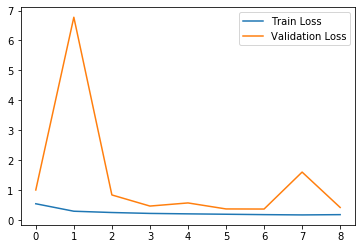

In [88]:
plt.figure()
plt.plot(history.history["loss"],label = "Train Loss")
plt.plot(history.history["val_loss"],label = "Validation Loss")
plt.legend()
plt.show()

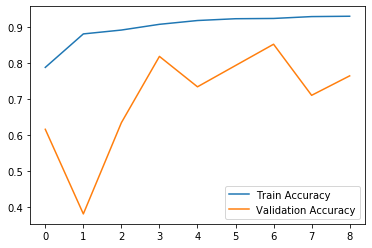

In [89]:
plt.figure()
plt.plot(history.history["acc"],label = "Train Accuracy")
plt.plot(history.history["val_acc"],label = "Validation Accuracy")
plt.legend()
plt.show()

In [90]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

19/19 [==============================] - 4s 196ms/step
